### Fifa22 Analystics

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [4]:
pd.set_option('display.max_rows', None)

In [16]:
df = pd.read_csv('players_22.csv', low_memory=False)
df.head().T

,0,1,2,3,4
sofifa_id,158023,188545,20801,190871,192985
player_url,https://sofifa.com/player/158023/lionel-messi/...,https://sofifa.com/player/188545/robert-lewand...,https://sofifa.com/player/20801/c-ronaldo-dos-...,https://sofifa.com/player/190871/neymar-da-sil...,https://sofifa.com/player/192985/kevin-de-bruy...
short_name,L. Messi,R. Lewandowski,Cristiano Ronaldo,Neymar Jr,K. De Bruyne
long_name,Lionel Andrés Messi Cuccittini,Robert Lewandowski,Cristiano Ronaldo dos Santos Aveiro,Neymar da Silva Santos Júnior,Kevin De Bruyne
player_positions,"RW, ST, CF",ST,"ST, LW","LW, CAM","CM, CAM"
overall,93,92,91,91,91
potential,93,92,91,91,91
value_eur,78000000.0,119500000.0,45000000.0,129000000.0,125500000.0
wage_eur,320000.0,270000.0,270000.0,270000.0,350000.0
age,34,32,36,29,30


In [21]:
# drop unsued columns
cols = list(df.columns) 
df = df[cols[2:77]]  

In [33]:
# df.drop_duplicates(inplace=True)
# df.isnull().sum()

In [24]:
df.body_type.value_counts()

Normal (170-185)    6685
Normal (185+)       4236
Lean (170-185)      4086
Lean (185+)         1938
Normal (170-)        669
Stocky (170-185)     560
Lean (170-)          477
Stocky (185+)        355
Unique               136
Stocky (170-)         97
Name: body_type, dtype: int64

In [25]:
df['preferred_foot'].value_counts()/19239 * 100
# df.shape

Right    76.272156
Left     23.727844
Name: preferred_foot, dtype: float64

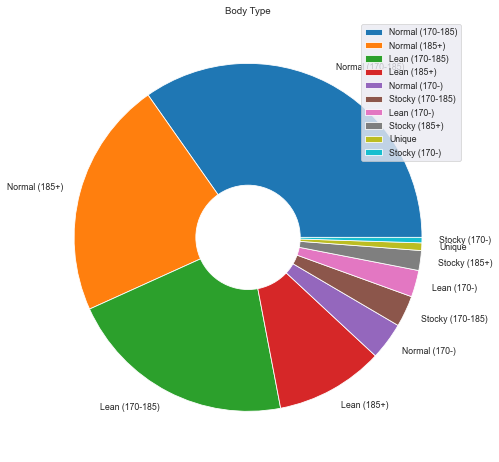

In [25]:
sns.set_context('paper')
value = df['body_type'].value_counts().values
label = df['body_type'].value_counts().index
plt.figure(figsize=(10,8))
circle = plt.Circle((0,0),0.3,color = "white") 
plt.pie(value, labels = label)
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Body Type")
plt.legend()
plt.show()

In [34]:
# Fast Player 22
player = df[['movement_acceleration', 'movement_sprint_speed','short_name', 'club_position','age', 'nationality_name','pace']].nlargest(5, 'movement_acceleration').set_index('short_name')
player

,movement_acceleration,movement_sprint_speed,club_position,age,nationality_name,pace
short_name,,,,,,
K. Mbappé,97,97,ST,22,France,97.0
Adama Traoré,97,96,LW,25,Spain,96.0
A. Davies,96,96,LB,20,Canada,96.0
M. Diaby,96,92,RM,21,France,94.0
D. James,96,95,SUB,23,Wales,95.0


In [9]:
# best Defence
player = df[['defending', 'defending_marking_awareness','long_name', 'club_position','age', 'nationality_name']].nlargest(5, [ 'defending_marking_awareness','defending']).set_index('long_name')
player

,defending,defending_marking_awareness,club_position,age,nationality_name
long_name,,,,,
Giorgio Chiellini,89.0,93,SUB,36,Italy
Virgil van Dijk,91.0,92,LCB,29,Netherlands
Mats Hummels,89.0,90,LCB,32,Germany
Rúben dos Santos Gato Alves Dias,88.0,90,RCB,24,Portugal
N'Golo Kanté,87.0,90,RCM,30,France


In [41]:
# Best Skillfull player
player = df[['skill_moves','skill_dribbling','short_name', 'club_position','age', 'nationality_name']].nlargest(5, ['skill_moves','skill_dribbling']).set_index('short_name')
player

,skill_moves,skill_dribbling,club_position,age,nationality_name
short_name,,,,,
Neymar Jr,5,95,LW,29,Brazil
K. Mbappé,5,93,ST,22,France
J. Sancho,5,92,LM,21,England
R. Mahrez,5,91,RW,30,Algeria
W. Zaha,5,91,RW,28,Côte d'Ivoire


In [45]:
# best long pass
player = df[['skill_long_passing','passing','shooting','movement_balance','short_name', 'club_position','age', 'nationality_name']].nlargest(5, ['skill_long_passing','passing']).set_index('short_name')
player

,skill_long_passing,passing,shooting,movement_balance,club_position,age,nationality_name
short_name,,,,,,,
K. De Bruyne,93,93.0,86.0,78,RCM,30,Belgium
T. Kroos,93,91.0,81.0,71,LCM,31,Germany
P. Pogba,92,86.0,81.0,67,RDM,28,France
L. Messi,91,91.0,92.0,95,RW,34,Argentina
Parejo,90,90.0,83.0,72,LCM,32,Spain


In [47]:
# best short pass
player = df[['attacking_short_passing','passing','shooting','movement_balance','short_name', 'club_position','age', 'nationality_name']].nlargest(5, ['attacking_short_passing','passing']).set_index('short_name')
player

,attacking_short_passing,passing,shooting,movement_balance,club_position,age,nationality_name
short_name,,,,,,,
K. De Bruyne,94,93.0,86.0,78,RCM,30,Belgium
T. Kroos,93,91.0,81.0,71,LCM,31,Germany
Parejo,92,90.0,83.0,72,LCM,32,Spain
Jorginho,92,86.0,67.0,72,LCM,29,Italy
Luis Alberto,92,86.0,76.0,83,LCM,28,Spain


In [49]:
# Bestshot 
player = df[['shooting','power_shot_power','physic','power_stamina','short_name', 'club_position','age', 'nationality_name']].nlargest(5, ['shooting','power_shot_power']).set_index('short_name')
player

,shooting,power_shot_power,physic,power_stamina,club_position,age,nationality_name
short_name,,,,,,,
Cristiano Ronaldo,94.0,94,75.0,77,ST,36,Portugal
R. Lewandowski,92.0,90,82.0,76,ST,32,Poland
L. Messi,92.0,86,65.0,72,RW,34,Argentina
E. Haaland,91.0,94,88.0,82,RS,20,Norway
H. Kane,91.0,91,83.0,83,ST,27,England


In [55]:
# bestattact 
player = df[['attacking_finishing','dribbling','attacking_volleys','movement_acceleration','short_name', 'club_position','age', 'nationality_name']].nlargest(5, ['attacking_finishing','dribbling','attacking_volleys']).set_index('short_name')
player 

,attacking_finishing,dribbling,attacking_volleys,movement_acceleration,club_position,age,nationality_name
short_name,,,,,,,
L. Messi,95,95.0,88,91,RW,34,Argentina
Cristiano Ronaldo,95,88.0,86,85,ST,36,Portugal
R. Lewandowski,95,86.0,89,77,ST,32,Poland
H. Kane,94,83.0,88,65,ST,27,England
E. Haaland,94,80.0,88,82,RS,20,Norway


In [11]:
# Best goalkeep
player = df[['goalkeeping_reflexes','goalkeeping_handling','goalkeeping_positioning','short_name', 'club_position','age', 'nationality_name']].nlargest(8, ['goalkeeping_reflexes']).set_index('short_name')
player

,goalkeeping_reflexes,goalkeeping_handling,goalkeeping_positioning,club_position,age,nationality_name
short_name,,,,,,
J. Oblak,90,92,90,GK,28,Slovenia
M. ter Stegen,90,85,88,GK,29,Germany
G. Donnarumma,90,83,85,GK,22,Italy
H. Lloris,90,83,84,GK,34,France
K. Schmeichel,90,78,83,GK,34,Denmark
Alisson,89,86,90,GK,28,Brazil
K. Navas,89,84,87,SUB,34,Costa Rica
M. Neuer,88,88,89,GK,35,Germany


In [13]:
rating

,Name,Ovearall
0,L. Messi,93
1,R. Lewandowski,92
2,Cristiano Ronaldo,91
3,Neymar Jr,91
4,K. De Bruyne,91
5,J. Oblak,91
6,K. Mbappé,91
7,M. Neuer,90
8,M. ter Stegen,90
9,H. Kane,90


<AxesSubplot:xlabel='Ovearall', ylabel='Name'>

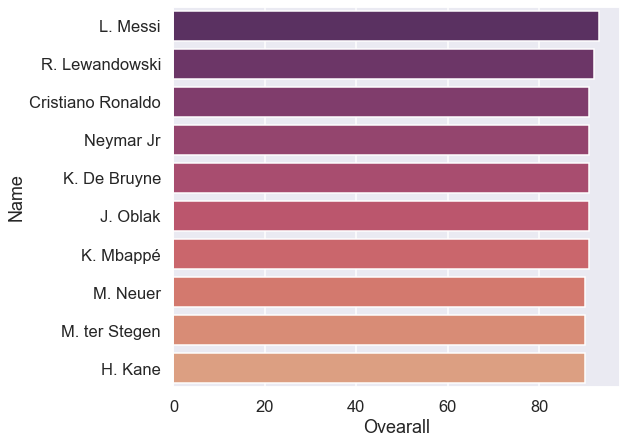

In [12]:
# Best rating
rating = pd.DataFrame({'Name': df['short_name'].head(10), 'Ovearall': df['overall'].head(10)})
x = rating['Name']
y = rating['Ovearall']
sns.set_context('talk')
plt.figure(figsize=(8,7))
sns.barplot(data=rating, x=y, y=x, palette='flare_r')

In [15]:
wages

,sofifa_id,player_url,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
short_name,,,,,,,,,,,,,,,,,,,,,
K. De Bruyne,192985,https://sofifa.com/player/192985/kevin-de-bruy...,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
K. Benzema,165153,https://sofifa.com/player/165153/karim-benzema...,Karim Benzema,"CF, ST",89,89,66000000.0,350000.0,33,1987-12-19,...,55+3,55+3,55+3,59+3,18+3,https://cdn.sofifa.net/players/165/153/22_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
L. Messi,158023,https://sofifa.com/player/158023/lionel-messi/...,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
Casemiro,200145,https://sofifa.com/player/200145/carlos-henriq...,Carlos Henrique Venancio Casimiro,CDM,89,89,88000000.0,310000.0,29,1992-02-23,...,86+3,86+3,86+3,81+3,21+3,https://cdn.sofifa.net/players/200/145/22_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/br.png
T. Kroos,182521,https://sofifa.com/player/182521/toni-kroos/22...,Toni Kroos,CM,88,88,75000000.0,310000.0,31,1990-01-04,...,71+3,71+3,71+3,74+3,19+3,https://cdn.sofifa.net/players/182/521/22_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png


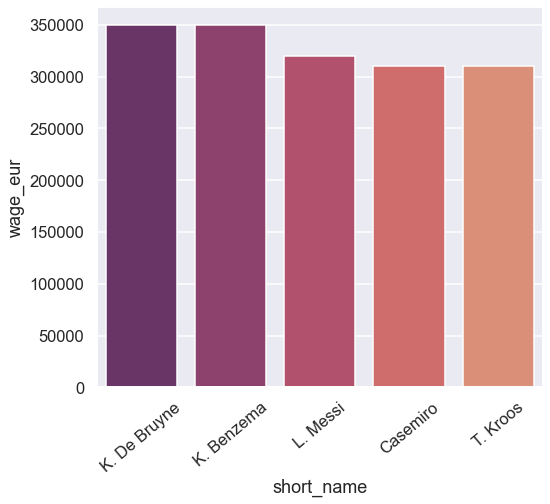

In [14]:
# playerwage
wages = df.nlargest(5, 'wage_eur').set_index('short_name')
x = wages.index
y = wages['wage_eur']
sns.set_context('talk')
plt.figure(figsize=(8,7))
sns.barplot(data=rating, x=x, y=y, palette='flare_r')
plt.xticks(rotation=40)
plt.show()

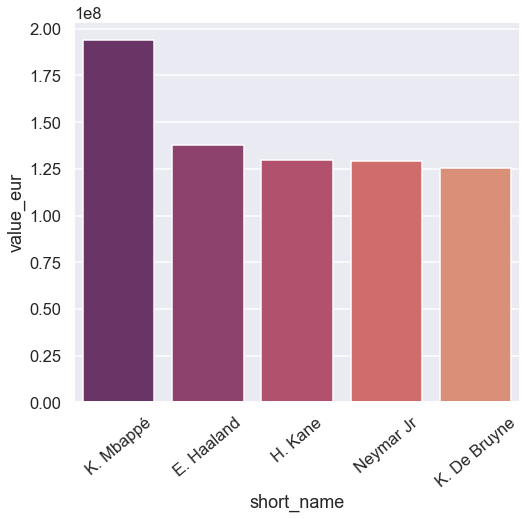

In [17]:
# Value
wages = df.nlargest(5, 'value_eur').set_index('short_name')
x = wages.index
y = wages['value_eur']
sns.set_context('talk')
plt.figure(figsize=(8,7))
sns.barplot(data=rating, x=x, y=y, palette='flare_r')
plt.xticks(rotation=40)
plt.show()

In [97]:
# wages = df.nlargest(40, 'value_eur').set_index('short_name')

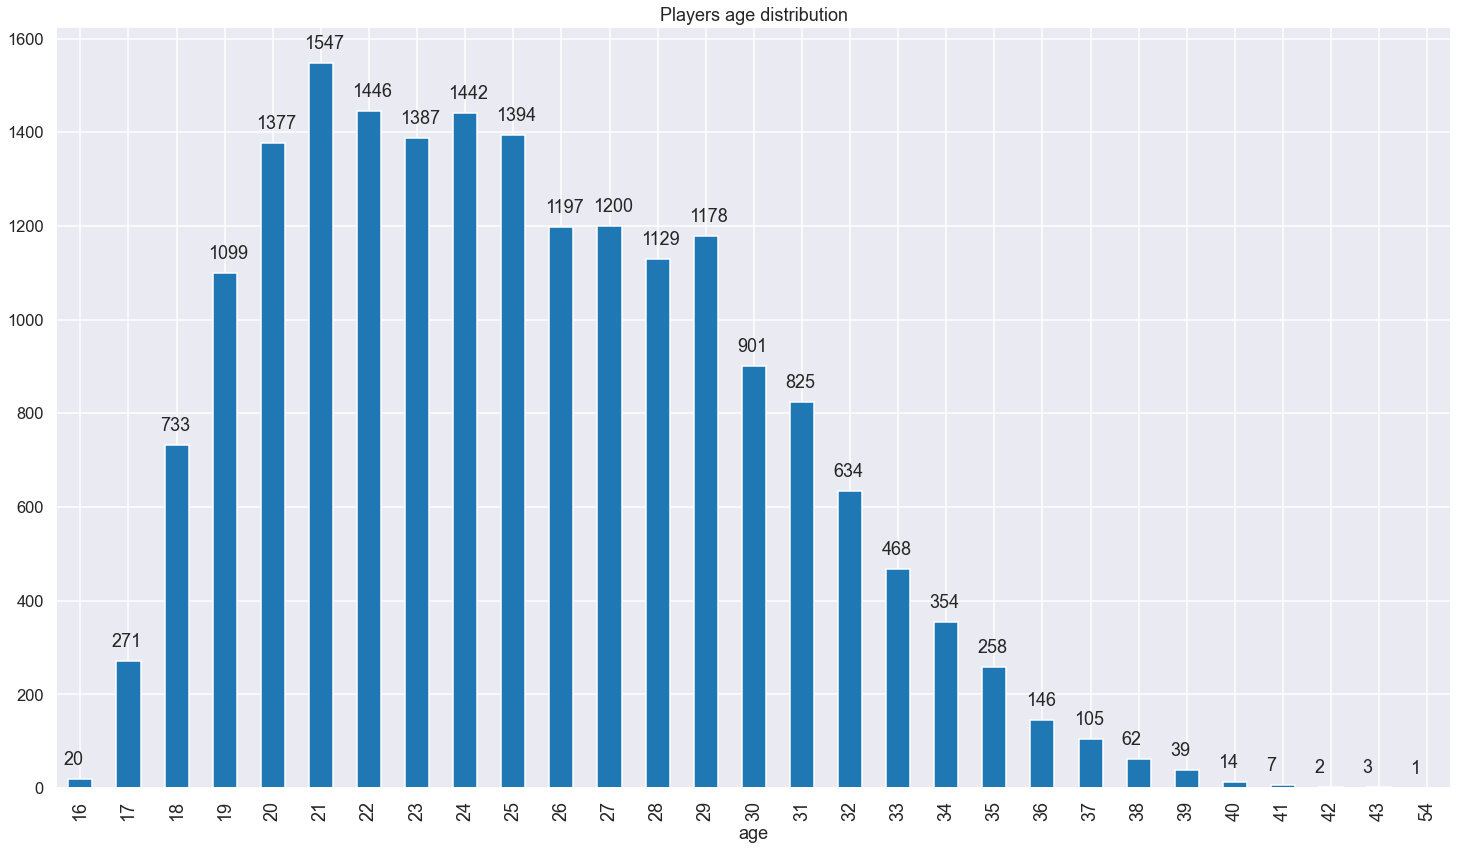

In [98]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(25,14))
ax = df.groupby('age')['short_name'].count().plot.bar()
plt.title('Players age distribution')
plt.xticks(fontsize=18)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))

In [ ]:
The end!